# HW05: Decision Tree Regression
## Sina Dadmand
### December 6, 2021

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from decimal import Decimal
from math import isnan


## Data Import

In [51]:
# Initializing data

data = np.genfromtxt("hw05_data_set.csv", delimiter = ",", skip_header=1)
data_train = data[:150]
data_test = data[150:]
X_train = data_train[:,0]
y_train = data_train[:,1]
X_test = data_test[:,0]
y_test = data_test[:,1]


In [52]:
class Node:
    is_terminal = None
    left_node = None
    right_node = None
    value = None
    
    def __init__(self, reaching_x, reaching_y, P):
        #print("I got: ",len(reaching_x))
        # Split
        x_sorted = np.sort(np.unique(reaching_x))
        split_candidate = np.empty((len(x_sorted)-1))
        if len(split_candidate) == 0:
            self.is_terminal = True
            self.value = np.mean(reaching_y)
        else:            
            for i in range(len(split_candidate)):
                split_candidate[i] = (x_sorted[i] + x_sorted[i+1])/2 # middle points
            # Try all of them
            split_errors = np.zeros_like(split_candidate)
            for i in range(len(split_candidate)):
                s = split_candidate[i]
                left_y = reaching_y[reaching_x < s]
                right_y = reaching_y[reaching_x >= s]
                # Calculate error
                split_errors[i] = (np.sum((left_y - np.mean(left_y)) * (left_y - np.mean(left_y))) + np.sum((right_y - np.mean(right_y))*(right_y - np.mean(right_y))))/len(reaching_y)
                
            # Get the best split
            best_split = split_candidate[np.argmin(split_errors)]
            
            # Split the data
            left_x = reaching_x[reaching_x < best_split]
            right_x = reaching_x[reaching_x >= best_split]
            left_y = reaching_y[reaching_x < best_split]
            right_y = reaching_y[reaching_x >= best_split]
            
            #print("Length of left x'es:",len(left_x))
            #print("Length of right x'es:",len(right_x))
            #print("\n\n")
            if len(left_x) == 0:
                # Only right
                self.is_terminal = True
                self.value = np.mean(right_y)        
            elif len(right_x) == 0:
                # Only left
                self.is_terminal = True
                self.value = np.mean(left_y)
            elif len(left_x) + len(right_x) <= P:
                # Prune
                self.is_terminal = True
                self.value = np.mean(np.append(left_y,right_y))
            else:
                # This is not a terminal node!
                self.is_terminal = False
                # Create left and right nodes.
                self.value = best_split            
                self.left_node = Node(left_x, left_y, P)
                self.right_node = Node(right_x, right_y, P)
            
# Class for decision tree
class desctree:
    root = None
    
    def __init__(self, X, Y, P):
        self.root = Node(X, Y, P)
          
    def predict(self, X):
        node = self.root
        while not node.is_terminal:
            split_value = node.value
            if X <= split_value:
                node = node.left_node
            else:
                node = node.right_node
        return node.value
        

def initPlot(X_train, X_test, y_train, y_test):
    pplt = plt.figure().add_subplot(111)
    pplt.plot(X_train, y_train, 'o', color='blue')
    pplt.plot(X_test, y_test, 'o', color='red')
    pplt.set_ylabel('Waiting time to next eruption (min)')
    pplt.set_xlabel('Eruption time (min)')
    return pplt

## Plotting

Text(0.5, 0, 'Eruption time (min)')

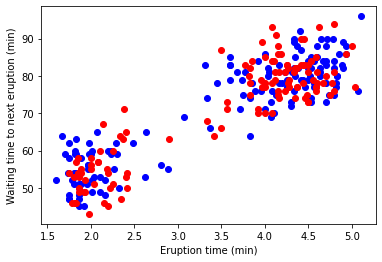

In [53]:
plot = plt.figure().add_subplot(111)
plot.plot(X_train, y_train, 'o', color='blue')
plot.plot(X_test, y_test, 'o', color='red')
plot.set_ylabel('Waiting time to next eruption (min)')
plot.set_xlabel('Eruption time (min)')


# Constructing the tree

In [54]:
# Constructing tree for P = 25

tree = desctree(X_train, y_train, 25)
y_test_pred = [tree.predict(x) for x in X_test]
y_train_pred = [tree.predict(x) for x in X_train]

train_rmse_error = Decimal(np.sqrt(np.sum((y_train - y_train_pred) * (y_train - y_train_pred)) / len(y_train))).quantize(Decimal('1.0000'))
test_rmse_error = Decimal(np.sqrt(np.sum((y_test - y_test_pred) * (y_test - y_test_pred)) / len(y_test))).quantize(Decimal('1.0000'))

print("RMSE on training set is",train_rmse_error,"when P is",25)
print("RMSE on test set is",test_rmse_error,"when P is",25)



RMSE on training set is 4.5412 when P is 25
RMSE on test set is 6.4541 when P is 25


<Figure size 432x288 with 0 Axes>

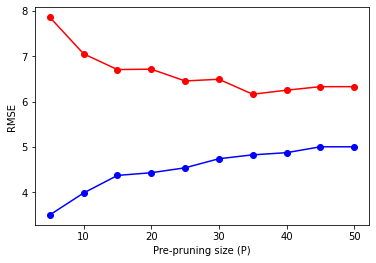

In [58]:
# Drawing line
data_interval = np.linspace(start=1.5, stop=5.2, num=int((5.2-1.5)//0.01))
data_interval_predict = [tree.predict(x) for x in data_interval]
plot.plot(data_interval, data_interval_predict, color = 'black')
plt.savefig('dataplot.png')

PP = np.arange(5, 55, 5)
rmse_errors_test = np.array([])
rmse_errors_train = np.array([])
for P in PP:
    tree = desctree(X_train, y_train, P)
    y_test_pred = [tree.predict(x) for x in X_test]
    y_train_pred = [tree.predict(x) for x in X_train]
    rmse_errors_train = np.append(rmse_errors_train,Decimal(np.sqrt(np.sum((y_train - y_train_pred) * (y_train - y_train_pred)) / len(y_train))).quantize(Decimal('1.0000')))
    rmse_errors_test = np.append(rmse_errors_test,Decimal(np.sqrt(np.sum((y_test - y_test_pred) * (y_test - y_test_pred)) / len(y_test))).quantize(Decimal('1.0000')))

# Plotting
pp_rmse_plot = plt.figure().add_subplot(111)
pp_rmse_plot.scatter(PP, rmse_errors_test, color='red');
pp_rmse_plot.plot(PP, rmse_errors_test, color='red');
pp_rmse_plot.scatter(PP, rmse_errors_train, color='blue');
pp_rmse_plot.plot(PP, rmse_errors_train, color='blue');
pp_rmse_plot.set_ylabel('RMSE')
pp_rmse_plot.set_xlabel('Pre-pruning size (P)')
plt.savefig('pptorms.png')
